In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel("walmart.xlsx")
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4,0,8,7969


In [3]:
cols = ['Occupation', 'Marital_Status', 'Product_Category','User_ID']
df[cols] = df[cols].astype('object')

In [4]:
df["Product_Category"].unique()

array([3, 1, 12, 8, 5, 4, 2, 6, 14, 11, 13, 15, 7, 16, 18, 10, 17, 9, 20,
       19], dtype=object)

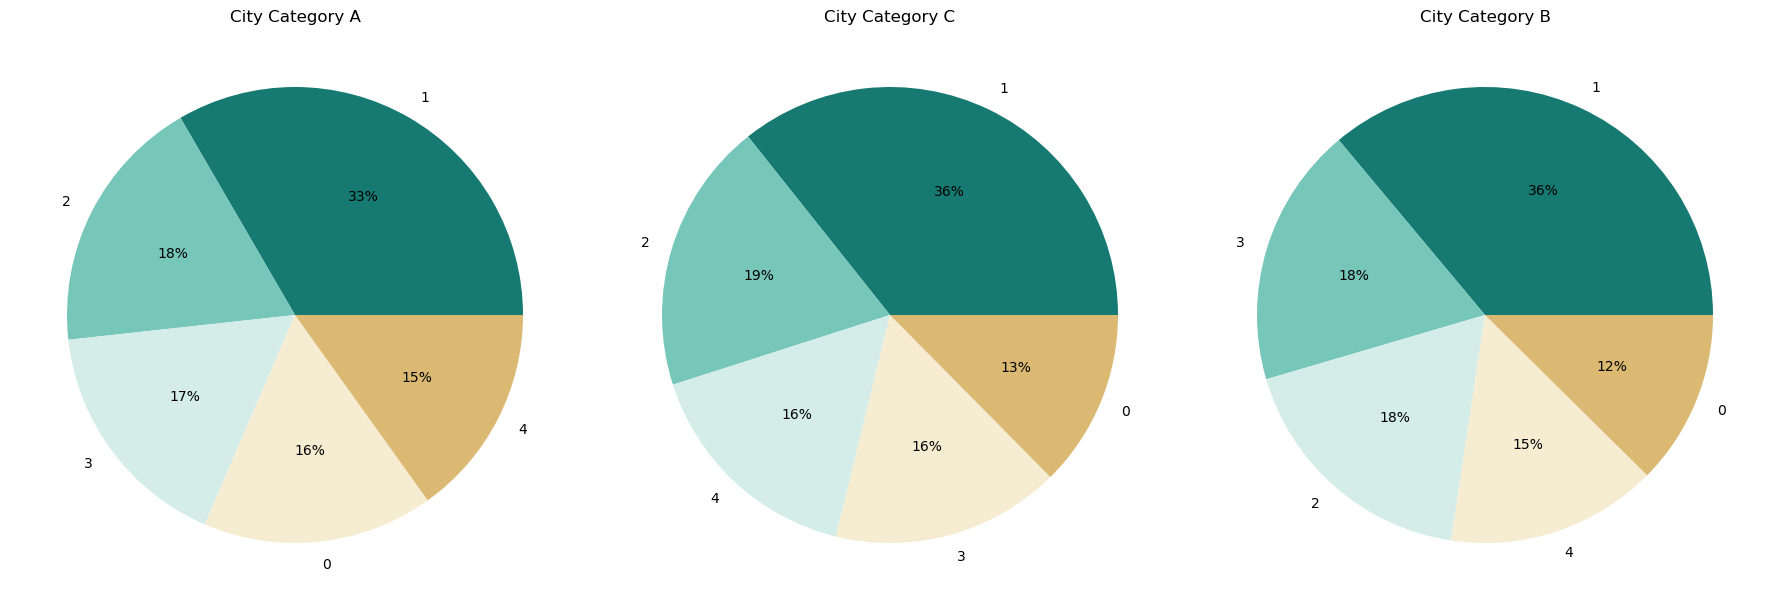

In [5]:
city_categories = df['City_Category'].unique()

# Set up subplots
fig, axs = plt.subplots(nrows=1, ncols=len(city_categories), figsize=(18, 6))

# Define colors
palette_color = sns.color_palette('BrBG_r')

# Plot pie charts for each city category
for i, city in enumerate(city_categories):
    city_data = df[df['City_Category'] == city]['Stay_In_Current_City_Years'].value_counts(normalize=True) * 100
    axs[i].pie(x=city_data.values, labels=city_data.index, autopct='%.0f%%', colors=palette_color)
    axs[i].set_title(f"City Category {city}")

plt.tight_layout()
plt.show()

In [6]:
amt_df_age = df.groupby(['User_ID', 'Age'])[['Purchase']].sum()
amt_df_age = amt_df_age.reset_index()
amt_df_age

,User_ID,Age,Purchase
0,1000001,0-17,334093
1,1000002,55+,810472
2,1000003,26-35,341635
3,1000004,46-50,206468
4,1000005,26-35,821001
...,...,...,...
5886,1006036,26-35,4116058
5887,1006037,46-50,1119538
5888,1006038,55+,90034
5889,1006039,46-50,590319


In [7]:
amt_df_age['Age'].value_counts()

Age
26-35    2053
36-45    1167
18-25    1069
46-50     531
51-55     481
55+       372
0-17      218
Name: count, dtype: int64

In [8]:
sample_size = 200
num_repitions = 1000

all_means = {}

age_intervals = ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']
for age_interval in age_intervals:
    all_means[age_interval] = []

for age_interval in age_intervals:
    for _ in range(num_repitions):
        mean = amt_df_age[amt_df_age['Age']==age_interval].sample(sample_size, replace=True)['Purchase'].mean()
        all_means[age_interval].append(mean)

In [9]:
for val in ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']:
    
    new_df = amt_df_age[amt_df_age['Age']==val] 
    
    margin_of_error_clt = 1.96*new_df['Purchase'].std()/np.sqrt(len(new_df))
    sample_mean = new_df['Purchase'].mean()
    lower_lim = sample_mean - margin_of_error_clt
    upper_lim = sample_mean + margin_of_error_clt

    print("For age {} --> confidence interval of means: ({:.2f}, {:.2f})".format(val, lower_lim, upper_lim))

For age 26-35 --> confidence interval of means: (945034.42, 1034284.21)
For age 36-45 --> confidence interval of means: (823347.80, 935983.62)
For age 18-25 --> confidence interval of means: (801632.78, 908093.46)
For age 46-50 --> confidence interval of means: (713505.63, 871591.93)
For age 51-55 --> confidence interval of means: (692392.43, 834009.42)
For age 55+ --> confidence interval of means: (476948.26, 602446.23)
For age 0-17 --> confidence interval of means: (527662.46, 710073.17)


In [10]:
amt_df_gender = df.groupby(['User_ID', 'Gender'])[['Purchase']].sum()
amt_df_gender = amt_df_gender.reset_index()
amt_df_gender

,User_ID,Gender,Purchase
0,1000001,F,334093
1,1000002,M,810472
2,1000003,M,341635
3,1000004,M,206468
4,1000005,M,821001
...,...,...,...
5886,1006036,F,4116058
5887,1006037,F,1119538
5888,1006038,F,90034
5889,1006039,F,590319


In [11]:
amt_df_gender['Gender'].value_counts()


Gender
M    4225
F    1666
Name: count, dtype: int64

In [12]:
male_avg = amt_df_gender[amt_df_gender['Gender']=='M']['Purchase'].mean()
female_avg = amt_df_gender[amt_df_gender['Gender']=='F']['Purchase'].mean()

print("Average amount spend by Male customers: {:.2f}".format(male_avg))
print("Average amount spend by Female customers: {:.2f}".format(female_avg))

Average amount spend by Male customers: 925344.40
Average amount spend by Female customers: 712024.39


In [13]:
amt_df_mar = df.groupby(['User_ID', 'Marital_Status'])[['Purchase']].sum()
amt_df_mar = amt_df_mar.reset_index()
amt_df_mar

,User_ID,Marital_Status,Purchase
0,1000001,0,334093
1,1000002,0,810472
2,1000003,0,341635
3,1000004,1,206468
4,1000005,1,821001
...,...,...,...
5886,1006036,1,4116058
5887,1006037,0,1119538
5888,1006038,0,90034
5889,1006039,1,590319


In [14]:
amt_df_mar['Marital_Status'].value_counts()

Marital_Status
0    3417
1    2474
Name: count, dtype: int64

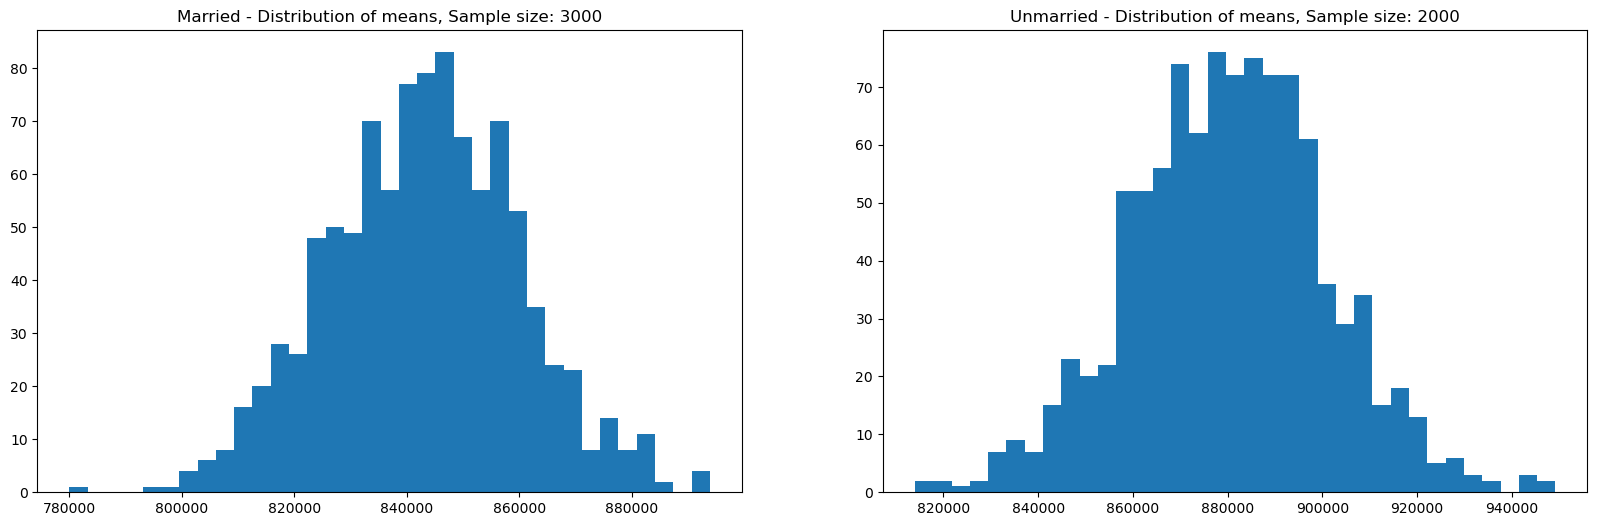

Population mean - Mean of sample means of amount spend for Married: 843086.09
Population mean - Mean of sample means of amount spend for Unmarried: 880393.40


In [15]:
marid_samp_size = 3000
unmarid_sample_size = 2000
num_repitions = 1000
marid_means = []
unmarid_means = []

for _ in range(num_repitions):
    marid_mean = amt_df_mar[amt_df_mar['Marital_Status']==1].sample(marid_samp_size, replace=True)['Purchase'].mean()
    unmarid_mean = amt_df_mar[amt_df_mar['Marital_Status']==0].sample(unmarid_sample_size, replace=True)['Purchase'].mean()
    
    marid_means.append(marid_mean)
    unmarid_means.append(unmarid_mean)
    
    
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

axis[0].hist(marid_means, bins=35)
axis[1].hist(unmarid_means, bins=35)
axis[0].set_title("Married - Distribution of means, Sample size: 3000")
axis[1].set_title("Unmarried - Distribution of means, Sample size: 2000")

plt.show()

print("Population mean - Mean of sample means of amount spend for Married: {:.2f}".format(np.mean(marid_means)))
print("Population mean - Mean of sample means of amount spend for Unmarried: {:.2f}".format(np.mean(unmarid_means)))



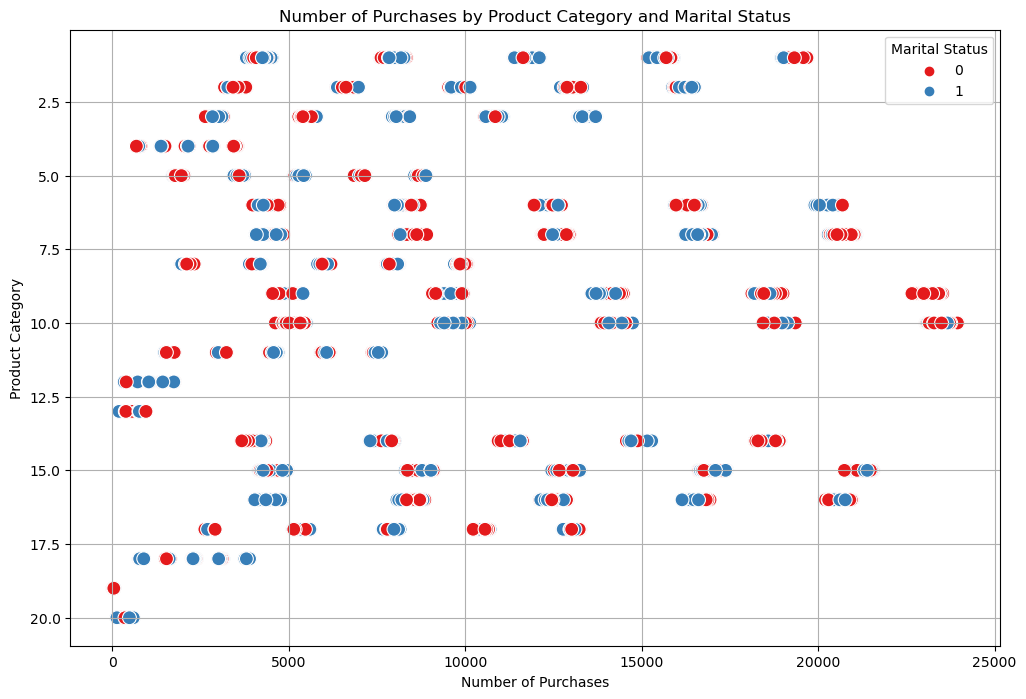

In [16]:
df['Marital_Status'] = df['Marital_Status'].astype('category')
df['Product_Category'] = df['Product_Category'].astype('category')

# Plot scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Purchase', y='Product_Category', hue='Marital_Status', palette='Set1', s=100)

plt.title('Number of Purchases by Product Category and Marital Status')
plt.xlabel('Number of Purchases')
plt.ylabel('Product Category')
plt.legend(title='Marital Status')
plt.grid(True)
plt.show()


Male Mean: 9452.494289999999, 95% CI: (9419.696832721402, 9485.291747278596)
Female Mean: 8717.20662, 95% CI: (8686.975260059657, 8747.437979940345)


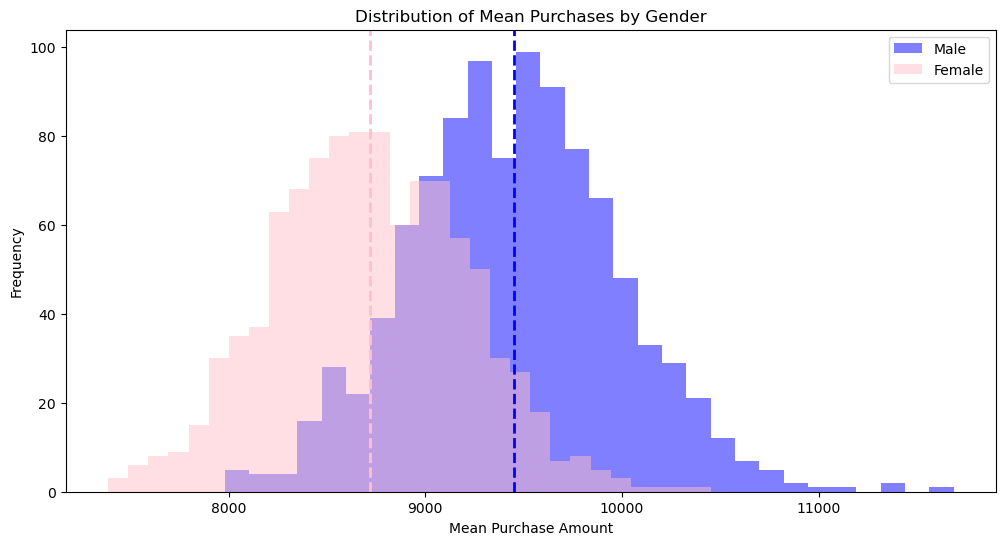

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


male_data = df[df['Gender'] == 'M']['Purchase']
female_data = df[df['Gender'] == 'F']['Purchase']

male_means = []
female_means = []

iterations = 1000
sample_size = 100

for _ in range(iterations):
    male_sample = male_data.sample(sample_size, replace=True)
    female_sample = female_data.sample(sample_size, replace=True)
    
    male_means.append(male_sample.mean())
    female_means.append(female_sample.mean())


male_mean = np.mean(male_means)
female_mean = np.mean(female_means)

male_conf_interval = stats.norm.interval(0.95, loc=male_mean, scale=np.std(male_means)/np.sqrt(len(male_means)))
female_conf_interval = stats.norm.interval(0.95, loc=female_mean, scale=np.std(female_means)/np.sqrt(len(female_means)))

print(f"Male Mean: {male_mean}, 95% CI: {male_conf_interval}")
print(f"Female Mean: {female_mean}, 95% CI: {female_conf_interval}")

# Plotting the distributions
plt.figure(figsize=(12, 6))
plt.hist(male_means, bins=30, alpha=0.5, label='Male', color='blue')
plt.hist(female_means, bins=30, alpha=0.5, label='Female', color='pink')
plt.axvline(male_mean, color='blue', linestyle='dashed', linewidth=2)
plt.axvline(female_mean, color='pink', linestyle='dashed', linewidth=2)
plt.title('Distribution of Mean Purchases by Gender')
plt.xlabel('Mean Purchase Amount')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [33]:
amt_df = df.groupby(['User_ID','Gender'])[['Purchase']].sum()
amt_df = amt_df.reset_index()
amt_df


,User_ID,Gender,Purchase
0,1000001,F,334093
1,1000002,M,810472
2,1000003,M,341635
3,1000004,M,206468
4,1000005,M,821001
...,...,...,...
5886,1006036,F,4116058
5887,1006037,F,1119538
5888,1006038,F,90034
5889,1006039,F,590319


In [31]:
df['User_ID'].nunique()

5891

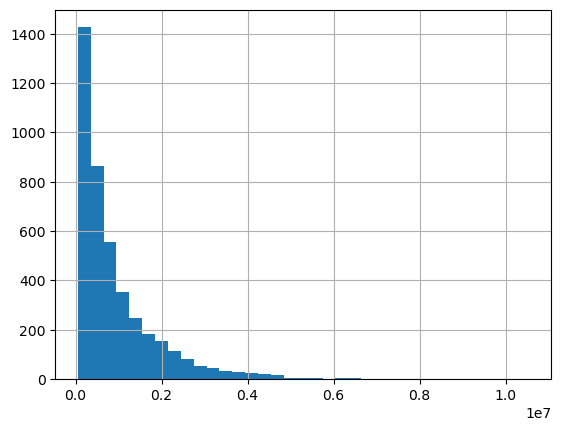

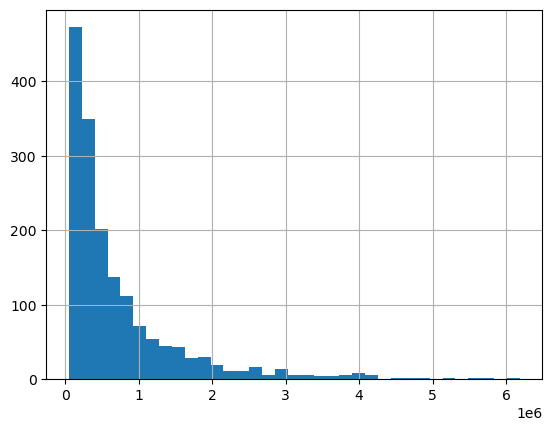

In [36]:
# histogram of average amount spend for each customer - Male & Female
amt_df[amt_df['Gender']=='M']['Purchase'].hist(bins=35)
plt.show()

amt_df[amt_df['Gender']=='F']['Purchase'].hist(bins=35)
plt.show()

In [26]:
male_avg = amt_df[amt_df['Gender']=='M']['Purchase'].mean()
female_avg = amt_df[amt_df['Gender']=='F']['Purchase'].mean()

print("Average amount spend by Male customers: {:.2f}".format(male_avg))
print("Average amount spend by Female customers: {:.2f}".format(female_avg))

Average amount spend by Male customers: 925344.40
Average amount spend by Female customers: 712024.39


In [37]:
male_df = amt_df[amt_df['Gender']=='M']
female_df = amt_df[amt_df['Gender']=='F']

In [38]:
genders = ["M", "F"]

male_sample_size = 3000
female_sample_size = 1500
num_repitions = 1000
male_means = []
female_means = []

for _ in range(num_repitions):
    male_mean = male_df.sample(male_sample_size, replace=True)['Purchase'].mean()
    female_mean = female_df.sample(female_sample_size, replace=True)['Purchase'].mean()
    
    male_means.append(male_mean)
    female_means.append(female_mean)

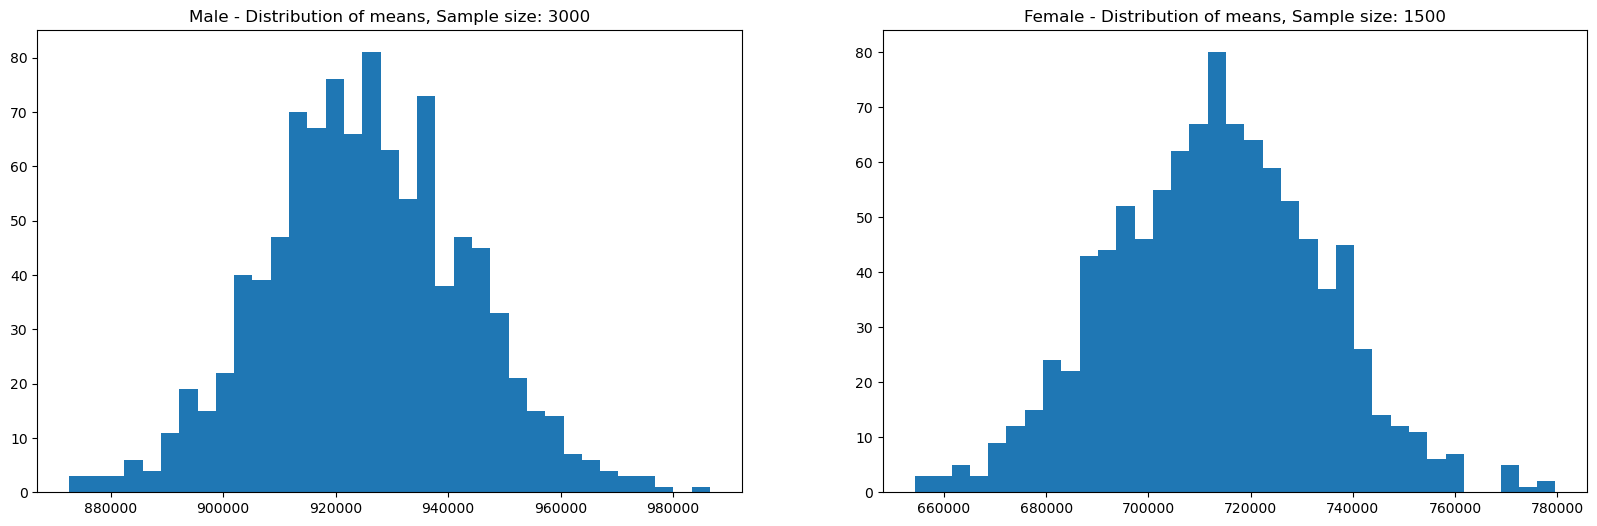

In [39]:
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

axis[0].hist(male_means, bins=35)
axis[1].hist(female_means, bins=35)
axis[0].set_title("Male - Distribution of means, Sample size: 3000")
axis[1].set_title("Female - Distribution of means, Sample size: 1500")

plt.show()


In [40]:
print("Population mean - Mean of sample means of amount spend for Male: {:.2f}".format(np.mean(male_means)))
print("Population mean - Mean of sample means of amount spend for Female: {:.2f}".format(np.mean(female_means)))

print("\nMale - Sample mean: {:.2f} Sample std: {:.2f}".format(male_df['Purchase'].mean(), male_df['Purchase'].std()))
print("Female - Sample mean: {:.2f} Sample std: {:.2f}".format(female_df['Purchase'].mean(), female_df['Purchase'].std()))

Population mean - Mean of sample means of amount spend for Male: 925436.86
Population mean - Mean of sample means of amount spend for Female: 712967.29

Male - Sample mean: 925344.40 Sample std: 985830.10
Female - Sample mean: 712024.39 Sample std: 807370.73


In [41]:
male_margin_of_error_clt = 1.96*male_df['Purchase'].std()/np.sqrt(len(male_df))
male_sample_mean = male_df['Purchase'].mean()
male_lower_lim = male_sample_mean - male_margin_of_error_clt
male_upper_lim = male_sample_mean + male_margin_of_error_clt

female_margin_of_error_clt = 1.96*female_df['Purchase'].std()/np.sqrt(len(female_df))
female_sample_mean = female_df['Purchase'].mean()
female_lower_lim = female_sample_mean - female_margin_of_error_clt
female_upper_lim = female_sample_mean + female_margin_of_error_clt

print("Male confidence interval of means: ({:.2f}, {:.2f})".format(male_lower_lim, male_upper_lim))
print("Female confidence interval of means: ({:.2f}, {:.2f})".format(female_lower_lim, female_upper_lim))

Male confidence interval of means: (895617.83, 955070.97)
Female confidence interval of means: (673254.77, 750794.02)


In [43]:
from scipy.stats import norm
z_95 = norm.ppf(0.95)

1.6448536269514722

In [45]:
z_90 = norm.ppf(0.90)

1.2815515655446004

In [46]:
z_99 = norm.ppf(0.99)

2.3263478740408408

In [49]:
se=male_df['Purchase'].std()/np.sqrt(len(male_df))
male=norm.interval(0.95,male_sample_mean,se)
male

(895618.3794063339, 955070.4253273939)

Male Mean: 9758.285639999998, 95% CI: (9732.879928948454, 9783.691351051542)
Female Mean: 8002.575779999999, 95% CI: (7972.229054034174, 8032.922505965825)

In [50]:
male_avg = df[df['Gender']=='M']['Purchase'].mean()
female_avg = df[df['Gender']=='F']['Purchase'].mean()

print("Average amount spend by Male customers: {:.2f}".format(male_avg))
print("Average amount spend by Female customers: {:.2f}".format(female_avg))

Average amount spend by Male customers: 9437.53
Average amount spend by Female customers: 8734.57
